In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

Looks like the top selling products are Fresh, Milk and Groceries. Numbers are expenditure of clients in monetary units

## Descriptive Statistics

## 1-1

In [225]:
# Read CSV file into DataFrame
df = pd.read_csv('wholesale.csv')

# Display first 5 rows
print(df.head(5), "\n")

# Calculate percentage of each column sum
print((df.sum() / df.sum().sum()) * 100)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185 

Channel              0.003981
Region               0.007653
Fresh               36.112841
Milk                17.442869
Grocery             23.928007
Frozen               9.244453
Detergents_Paper     8.671360
Delicassen           4.588836
dtype: float64


## 1-2

In [226]:
df.info() # Display DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## 1-3

<Figure size 600x700 with 0 Axes>

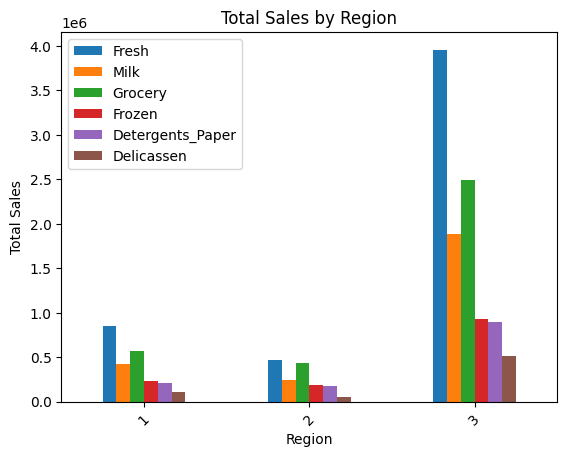

In [249]:
# Plot total sales of different product categories by region
plt.figure(figsize=(6,7))
df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum().plot(kind='bar')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.title('Total Sales by Region')

# Set labels for x and y axes
plt.xlabel('Region')
plt.ylabel('Total Sales')

# Display the plot
plt.show()


## 1-4

Region
1    16.32
2    10.64
3    73.03
dtype: float64


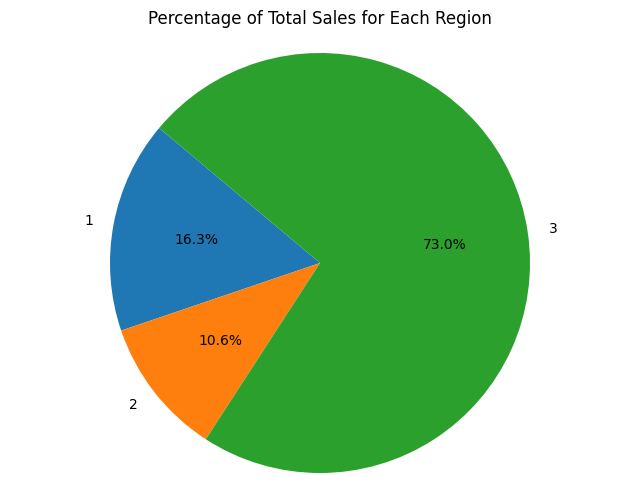

In [250]:
# Calculate percentage of total sales for each region across all product categories
print(round(df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum().sum(axis=1) / df.sum().sum() * 100, 2))

# Pie chart for percentage of total sales for each region
plt.figure(figsize=(8, 6))
region_sales_percentage = df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum().sum(axis=1) / df.sum().sum() * 100
plt.pie(region_sales_percentage, labels=region_sales_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Sales for Each Region')
plt.axis('equal')
plt.show()




## 1-5

In [229]:
# Calculate percentage of total sales for each channel across all product categories
df.groupby('Channel')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum().sum(axis=1) / df.sum().sum() * 100


Channel
1    54.712120
2    45.276246
dtype: float64

## 1-6

       Channel  Region      Fresh      Milk   Grocery    Frozen  \
count   440.00  440.00     440.00    440.00    440.00    440.00   
mean      1.32    2.54   12000.30   5796.27   7951.28   3071.93   
std       0.47    0.77   12647.33   7380.38   9503.16   4854.67   
min       1.00    1.00       3.00     55.00      3.00     25.00   
25%       1.00    2.00    3127.75   1533.00   2153.00    742.25   
50%       1.00    3.00    8504.00   3627.00   4755.50   1526.00   
75%       2.00    3.00   16933.75   7190.25  10655.75   3554.25   
max       2.00    3.00  112151.00  73498.00  92780.00  60869.00   

       Detergents_Paper  Delicassen  
count            440.00      440.00  
mean            2881.49     1524.87  
std             4767.85     2820.11  
min                3.00        3.00  
25%              256.75      408.25  
50%              816.50      965.50  
75%             3922.00     1820.25  
max            40827.00    47943.00  


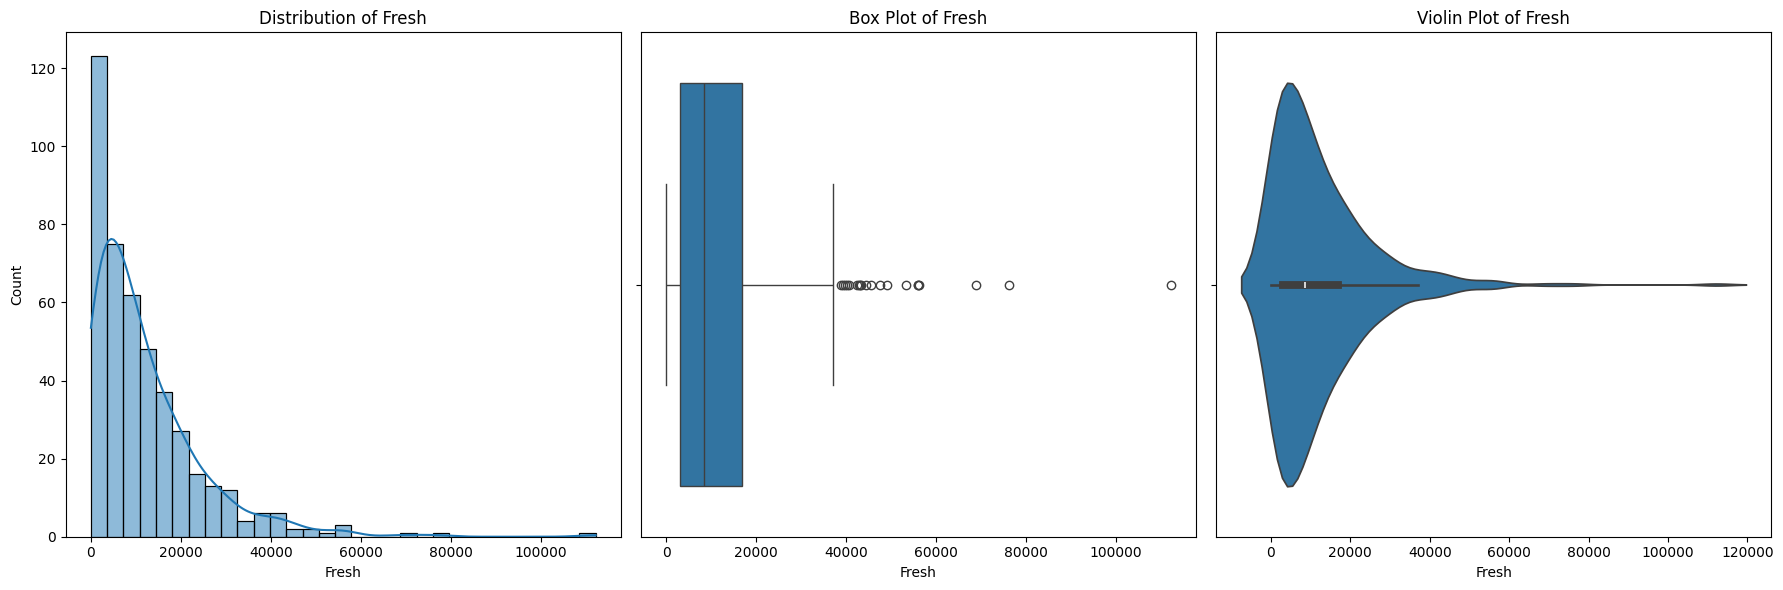

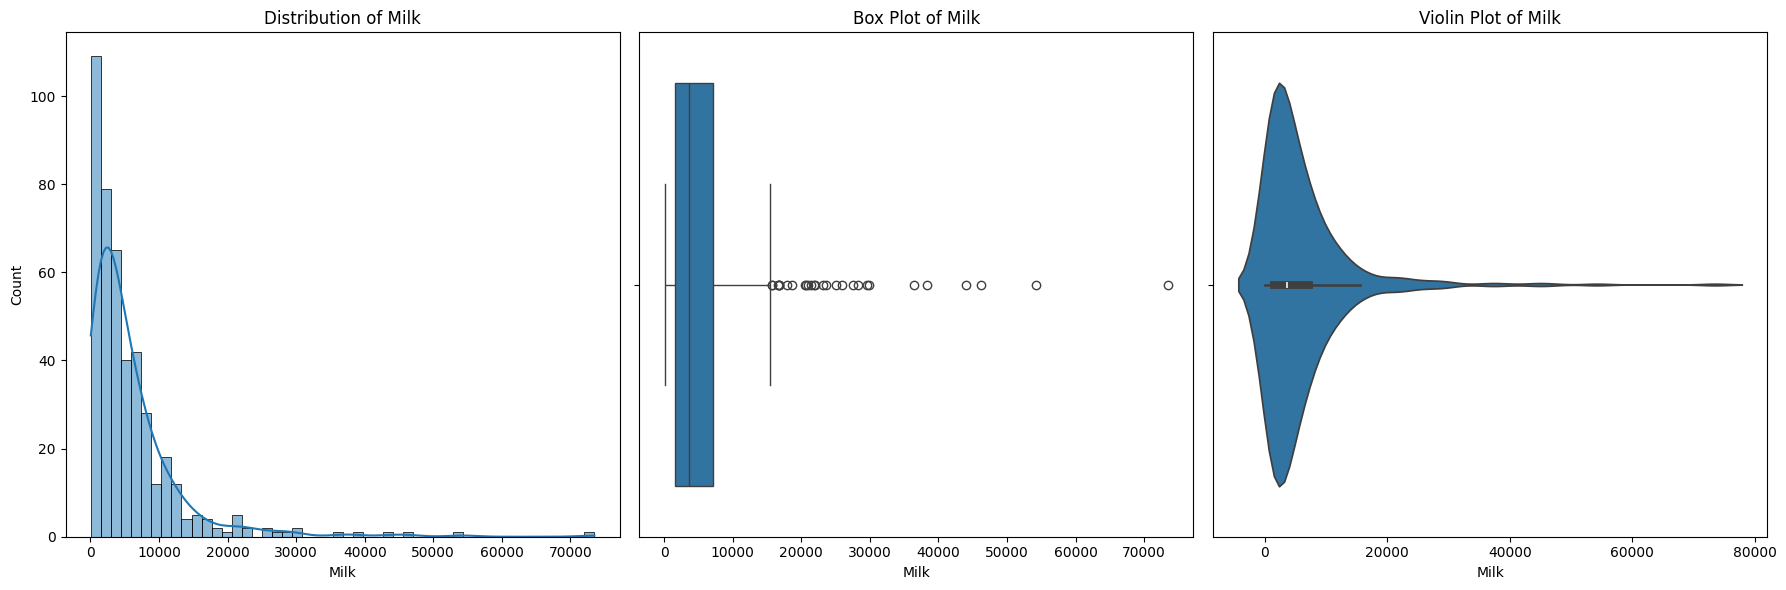

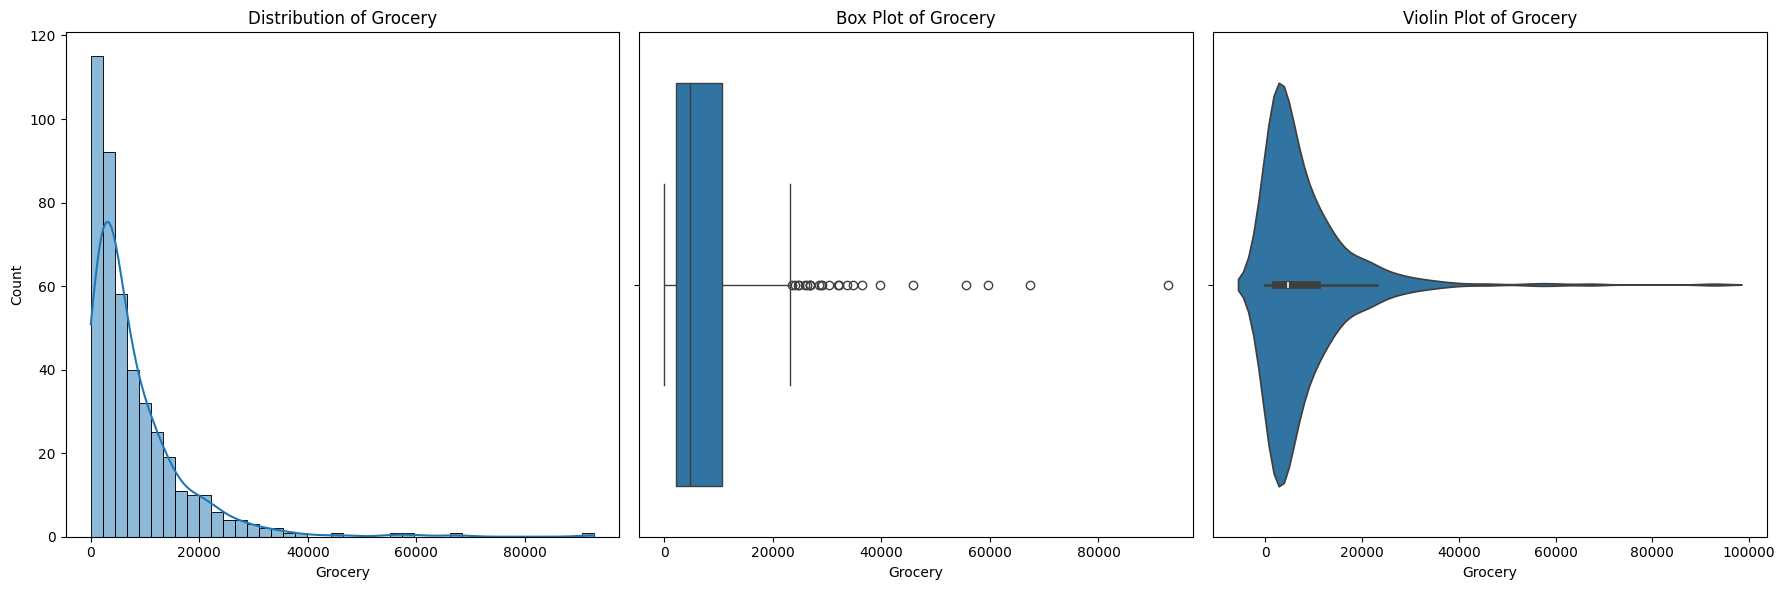

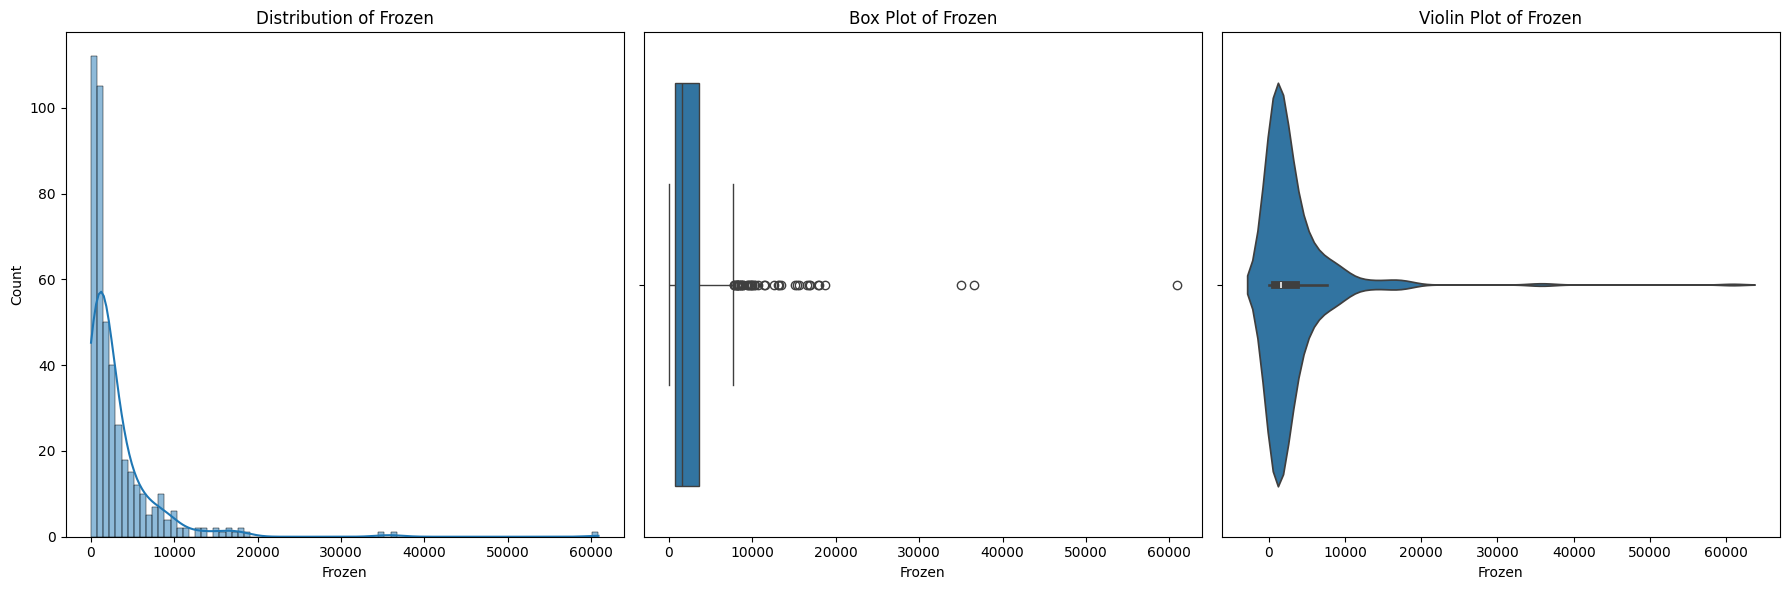

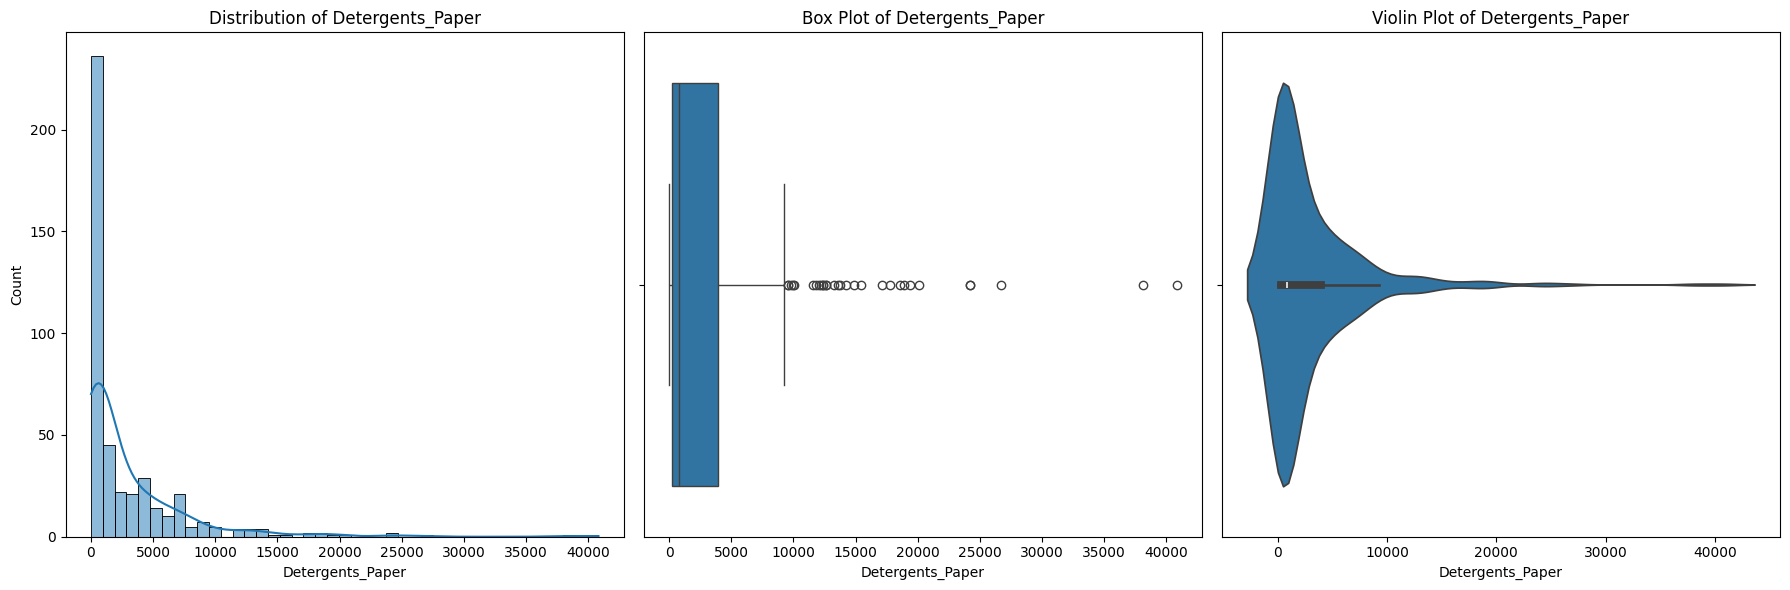

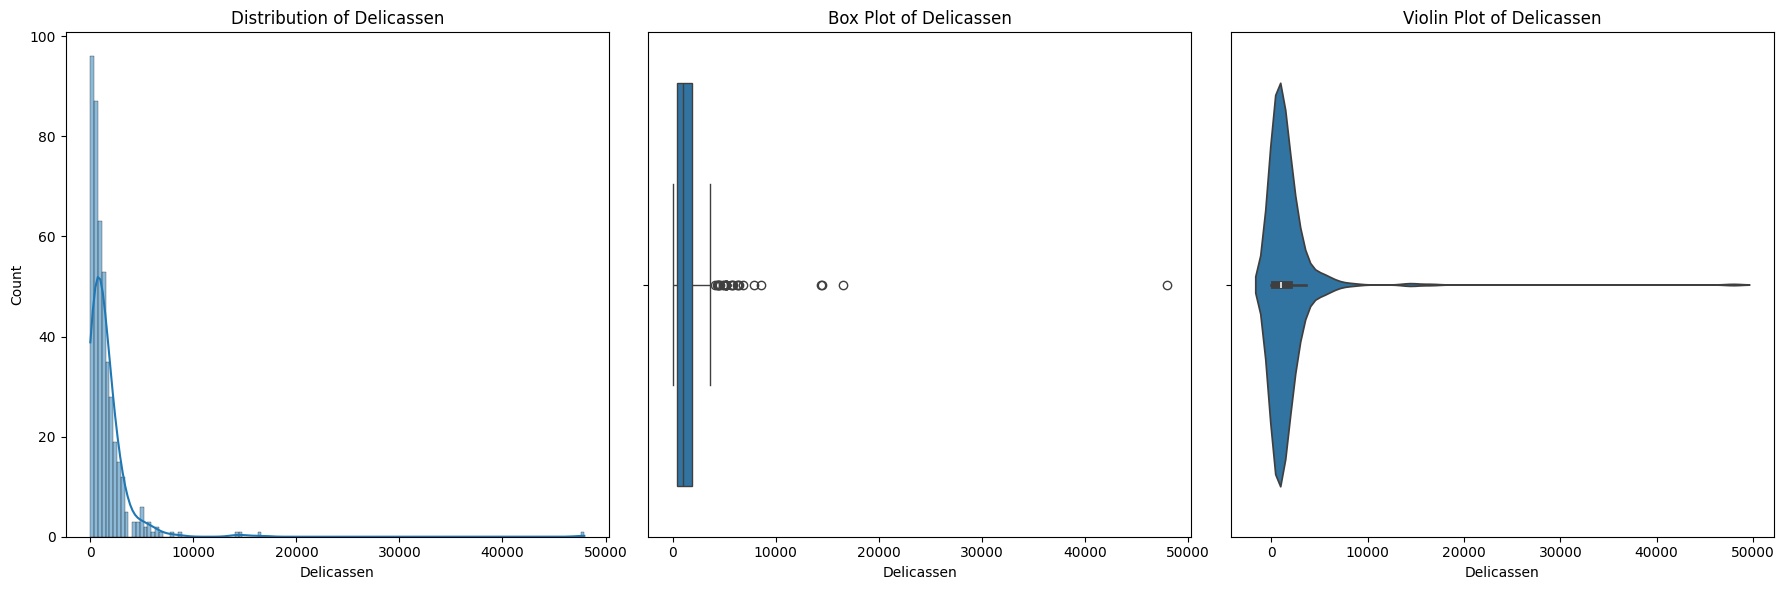

In [230]:
# Basic descriptive statistics for each category
print(df.describe().round(2))

# Distribution Analysis with Violin Plots
for column in df.columns[2:]:
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    sns.histplot(df[column], kde=True, ax=ax[0])
    ax[0].set_title(f'Distribution of {column}')
    sns.boxplot(x=df[column], ax=ax[1])
    ax[1].set_title(f'Box Plot of {column}')
    sns.violinplot(x=df[column], ax=ax[2])
    ax[2].set_title(f'Violin Plot of {column}')
    plt.tight_layout()
    plt.show()




## Probability

## 1-7

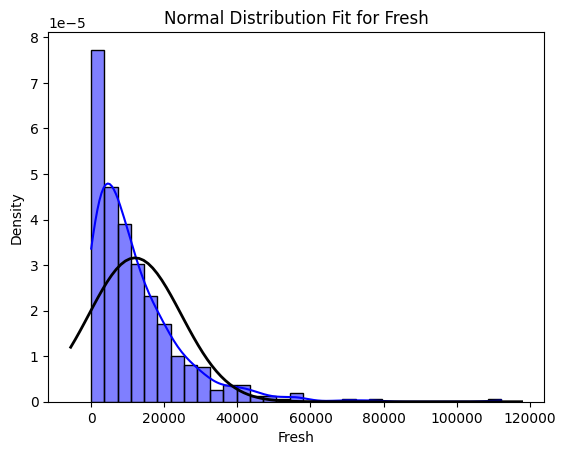

Normal Fit for Fresh: Mean = 12000.3, Std = 12632.95


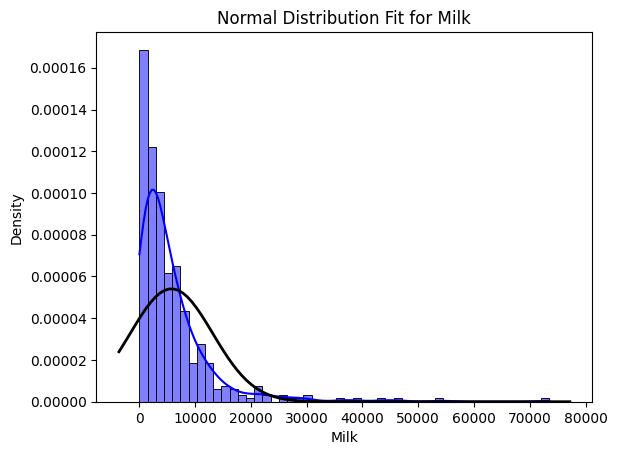

Normal Fit for Milk: Mean = 5796.27, Std = 7371.99


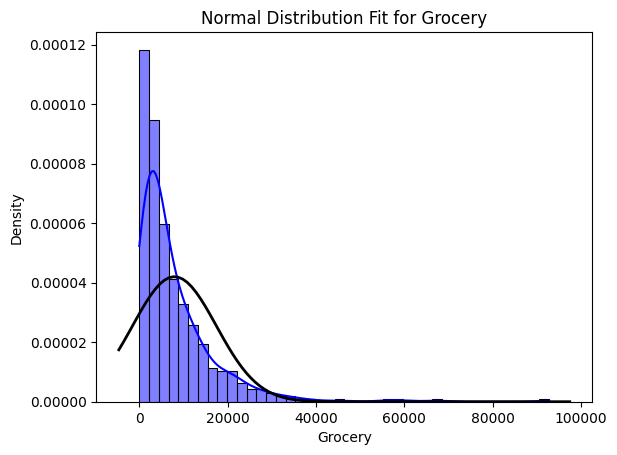

Normal Fit for Grocery: Mean = 7951.28, Std = 9492.36


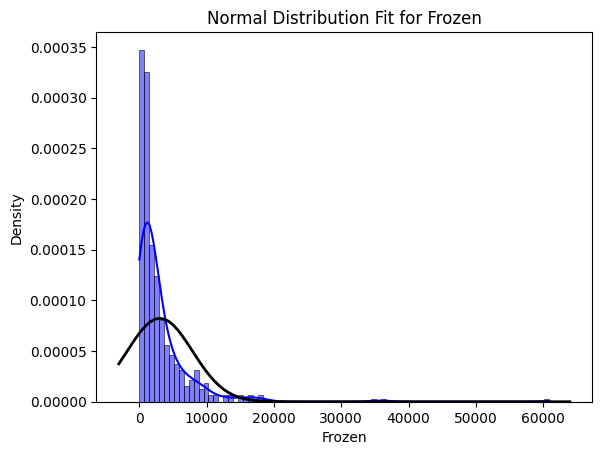

Normal Fit for Frozen: Mean = 3071.93, Std = 4849.15


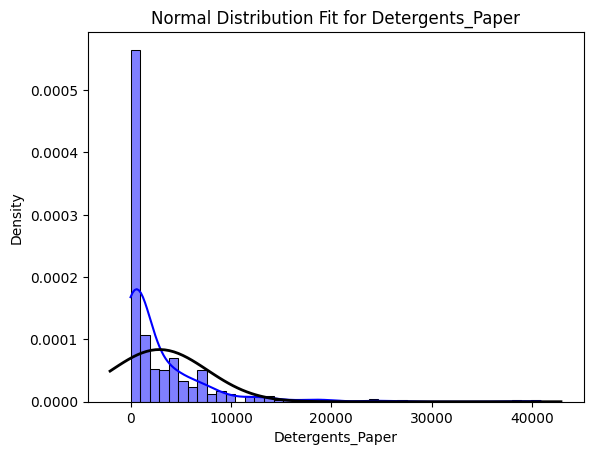

Normal Fit for Detergents_Paper: Mean = 2881.49, Std = 4762.43


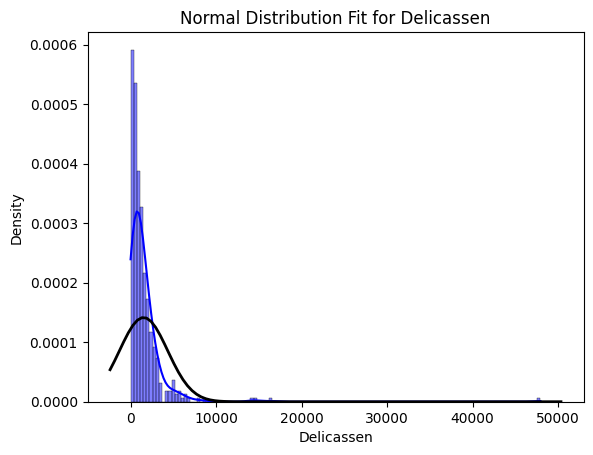

Normal Fit for Delicassen: Mean = 1524.87, Std = 2816.9
Expected number of purchases (lambda) for 'Frozen': 3071.93


In [231]:
# Normal Distribution Fit
for column in df.columns[2:]:
    mu, std = stats.norm.fit(df[column])
    plt.figure()
    sns.histplot(df[column], kde=True, stat='density', color='blue')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Normal Distribution Fit for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()
    print(f"Normal Fit for {column}: Mean = {round(mu, 2)}, Std = {round(std, 2)}")

# Poisson Distribution for 'Frozen'
lambda_frozen = df['Frozen'].mean()
print(f"Expected number of purchases (lambda) for 'Frozen': {round(lambda_frozen, 2)}")

## 1-8

T-test for 'Fresh' between Channels 1 and 2: T-stat=3.59, P-value=0.0


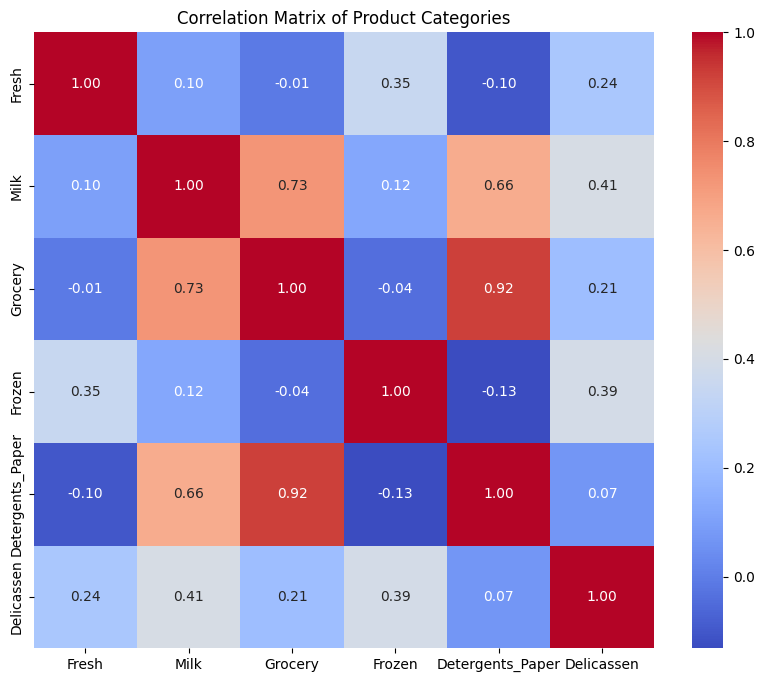

In [232]:
# Comparing the mean spending on 'Fresh' between two channels
t_stat, p_val = stats.ttest_ind(df[df['Channel'] == 1]['Fresh'], df[df['Channel'] == 2]['Fresh'])
print(f"T-test for 'Fresh' between Channels 1 and 2: T-stat={round(t_stat, 2)}, P-value={round(p_val, 2)}")

## Correlations Between Categories
# Heatmap of Pearson correlation coefficients between product categories
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 2:].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Product Categories')
plt.show()

***Observations:***
- Our analysis shows a strong connection between spending on groceries and spending on detergents and paper products. Customers who put more in their grocery carts also tend to buy more laundry detergent, paper towels, and other cleaning supplies. This makes intuitive sense - the more you cook and prepare food at home, the more you need supplies to keep your home clean.

- We also see that milk purchases are closely linked to grocery and detergent/paper spending. When customers buy more milk, they also spend more on other grocery staples and home cleaning products. Milk is a common purchase for most households, so higher milk spending likely indicates overall higher grocery spending.

- Finally, our statistical tests confirm that the difference in spending on fresh products between the two retail channels is very unlikely to be due to chance. Customers clearly spend significantly more on fresh fruits, vegetables, meats, and bakery items at one channel compared to the other. This difference in fresh food spending is quite substantial and consistent in our data.

## Sampling Distributions

### Studying the confidence interval of the major products consumed

## 1-9

In [233]:
# Drop 'Channel' and 'Region' columns from DataFrame
df_products = df.drop(columns=['Channel', 'Region'], axis=1)


## 1-10

In [234]:
# Display column names of the DataFrame for product categories
print("Columns of the DataFrame for product categories:")
df_products.columns


Columns of the DataFrame for product categories:


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

## 1-11

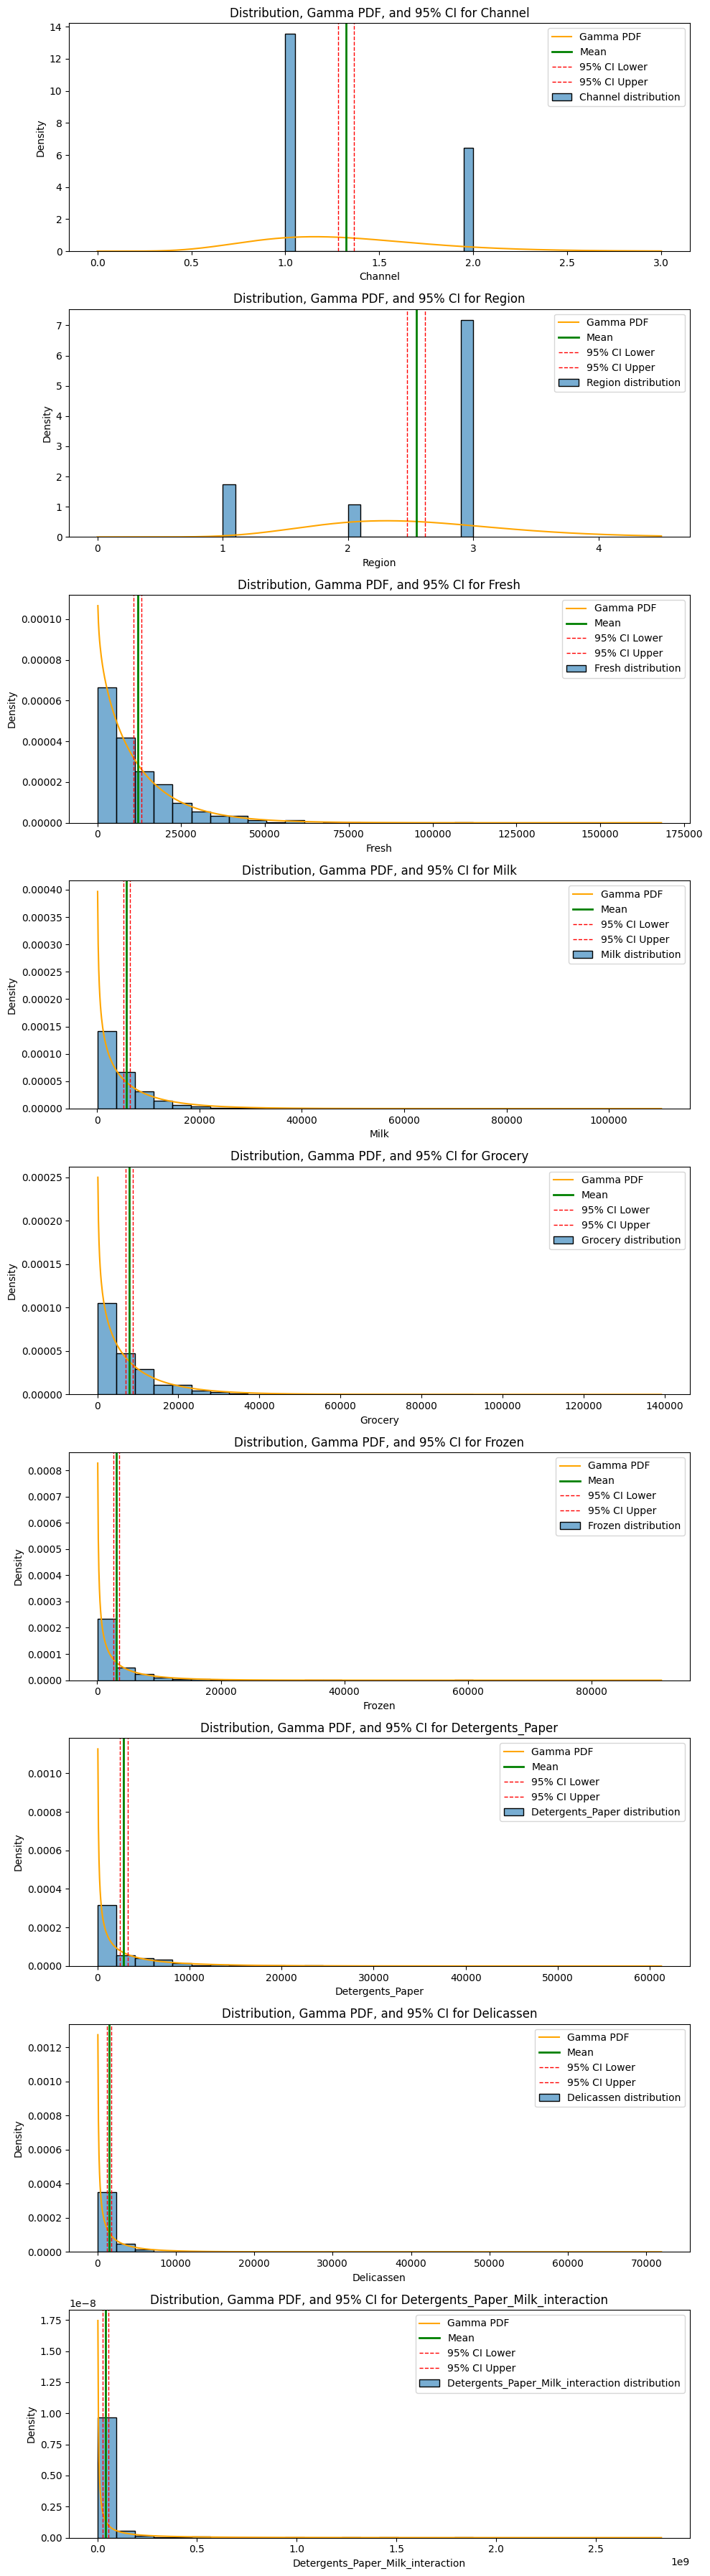

In [311]:
# Visualize each column's data distribution, Gamma PDF, and 95% confidence intervals.

num_columns = len(df.columns)
fig, axs = plt.subplots(num_columns, 1, figsize=(10, num_columns*4))  # One plot per column for clarity

for idx, column in enumerate(df.columns):
    data = df[column]
    mean = np.mean(data)
    standard_deviation = np.std(data)
    shape_df = len(data)
    
    # Calculating the Gamma distribution parameters
    variance_gamma = standard_deviation**2
    k_gamma = mean**2 / variance_gamma  # Shape parameter
    theta_gamma = variance_gamma / mean  # Scale parameter

    # Plotting the histogram of the data
    sns.histplot(data, kde=False, ax=axs[idx], label=f"{column} distribution", alpha=0.6, bins=20, stat="density")
    
    # Overlaying the Gamma PDF
    x = np.linspace(0, max(data)*1.5, 1000)
    y = stats.gamma.pdf(x, a=k_gamma, scale=theta_gamma)
    axs[idx].plot(x, y, label=f"Gamma PDF", color='orange')
    
    # Calculating and plotting the mean and 95% confidence intervals
    standard_error = standard_deviation / np.sqrt(shape_df)
    lower = mean - 1.96 * standard_error  # For 95% confidence interval
    upper = mean + 1.96 * standard_error
    axs[idx].axvline(x=mean, color='green', linestyle='-', linewidth=2, label='Mean')
    axs[idx].axvline(x=lower, color='red', linestyle='--', linewidth=1, label='95% CI Lower')
    axs[idx].axvline(x=upper, color='red', linestyle='--', linewidth=1, label='95% CI Upper')
    
    axs[idx].set_title(f'Distribution, Gamma PDF, and 95% CI for {column}')
    axs[idx].legend()

plt.tight_layout()
plt.show()


### Testing for Independence

## 1-13

$H_0 :$  There's no association between Channel sales and Regions

In [237]:
# Define row and column labels
rowlabel = ['Channel 1', 'Channel 2']
collabel = ['Region 1', 'Region 2', 'Region 3']

# Create a cross-tabulation table
table = pd.crosstab(df['Channel'], df['Region'], margins=False, normalize=False)

# Set row and column labels
table.index = rowlabel
table.columns = collabel

# Display the table
print("Cross-tabulation of Channel and Region without normalization:")
print(table)

Cross-tabulation of Channel and Region without normalization:
           Region 1  Region 2  Region 3
Channel 1        59        28       211
Channel 2        18        19       105


In [238]:
# Define row and column labels
rowlabel = ['Channel 1', 'Channel 2']
collabel = ['Region 1', 'Region 2', 'Region 3']

# Create a cross-tabulation table with normalized frequencies
prop = pd.crosstab(df['Channel'], df['Region'], margins=False, normalize=True)

# Set row and column labels
prop.index = rowlabel
prop.columns = collabel

# Display the table with rounded values
print("Cross-tabulation of Channel and Region with normalized frequencies:")
print(prop.round(2))

Cross-tabulation of Channel and Region with normalized frequencies:
           Region 1  Region 2  Region 3
Channel 1      0.13      0.06      0.48
Channel 2      0.04      0.04      0.24


In [239]:
# Convert the previously created 'table' into a
# 'Table' object from statsmodels.
table = sm.stats.Table(table)

# Print the fitted values of the table. Fitted values in the context of a contingency table
# are the expected frequencies of observations for each cell of the table under the null
# hypothesis of independence between the variables. In other words, it shows what the distribution
# of 'Channel' across 'Region' would look like if there were no association between the two.
print(table.fittedvalues)

# Perform a test for nominal association between 'Channel' and 'Region'. This test evaluates
# whether there is a statistically significant association between the two categorical variables.
# The test used here is likely a Chi-squared test of independence, which is common for this type
# of analysis. The result of this test includes the Chi-squared statistic and the p-value, among
# other details.
X2 = table.test_nominal_association()

print(X2)


           Region 1   Region 2    Region 3
Channel 1     52.15  31.831818  214.018182
Channel 2     24.85  15.168182  101.981818
df          2
pvalue      0.11365689324243589
statistic   4.349142154535748


In [240]:
print("Standardized residuals:")
table.standardized_resids    

Standardized residuals:


,Region 1,Region 2,Region 3
Channel 1,1.838309,-1.264988,-0.684097
Channel 2,-1.838309,1.264988,0.684097


Based on the results for the Chi-squared test, there is no dependence between the channels and the regions. 


p-Val = .099


Chi-squared Statistic: .009


***Sales Startegy:***
- We can execute a sales strategy that is uniform across channel or region. This means that we can design a marketing campaign that is the same across all channels and regions.

## 1-14

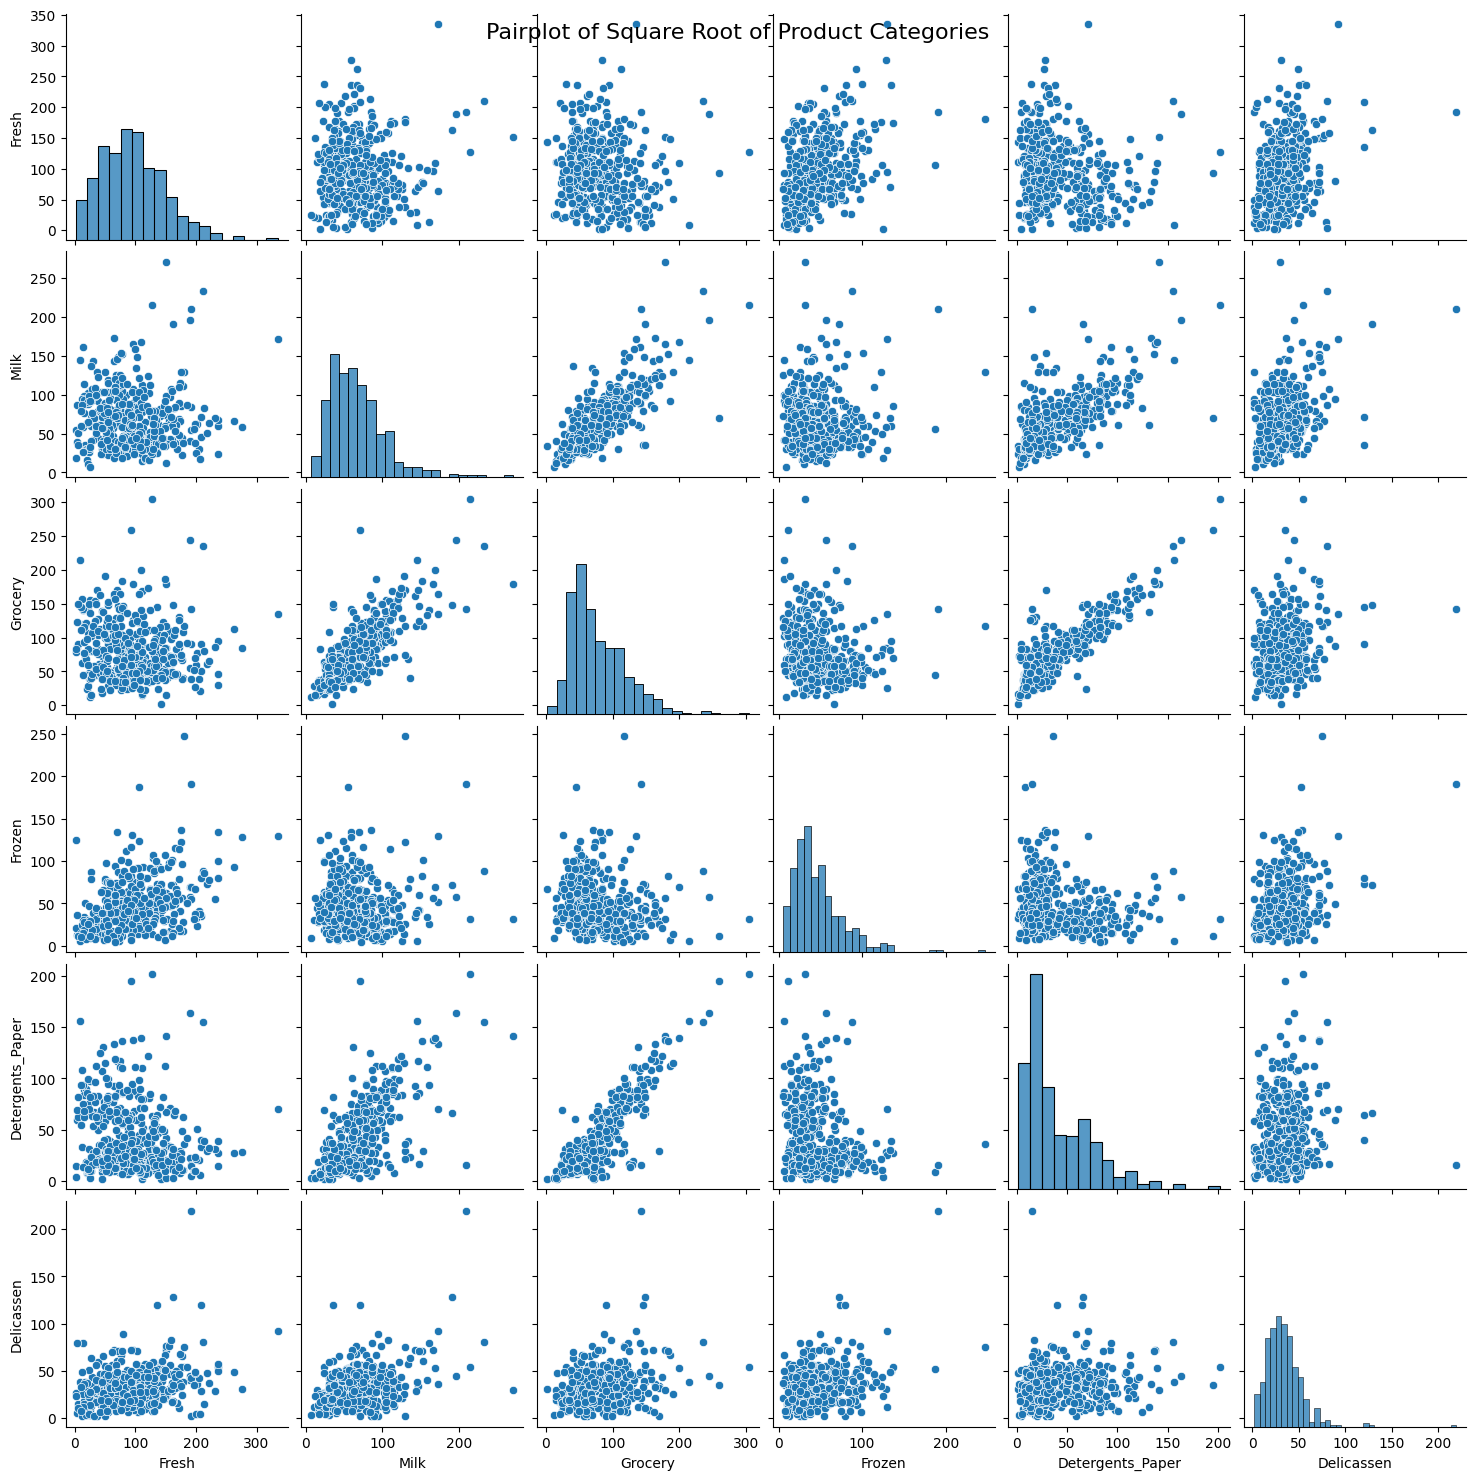

In [245]:
# Plotting pairplot using square root of data
pairplot_fig = sns.pairplot(data=np.sqrt(df_products))
pairplot_fig.fig.suptitle('Pairplot of Square Root of Product Categories', size=16)  
plt.show()


### Fitting Models for Prediction

## 1-15

Summary of the Linear Model:
                            OLS Regression Results                            
Dep. Variable:                Grocery   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1060.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):          7.63e-200
Time:                        02:26:35   Log-Likelihood:                -4188.5
No. Observations:                 440   AIC:                             8385.
Df Residuals:                     436   BIC:                             8401.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

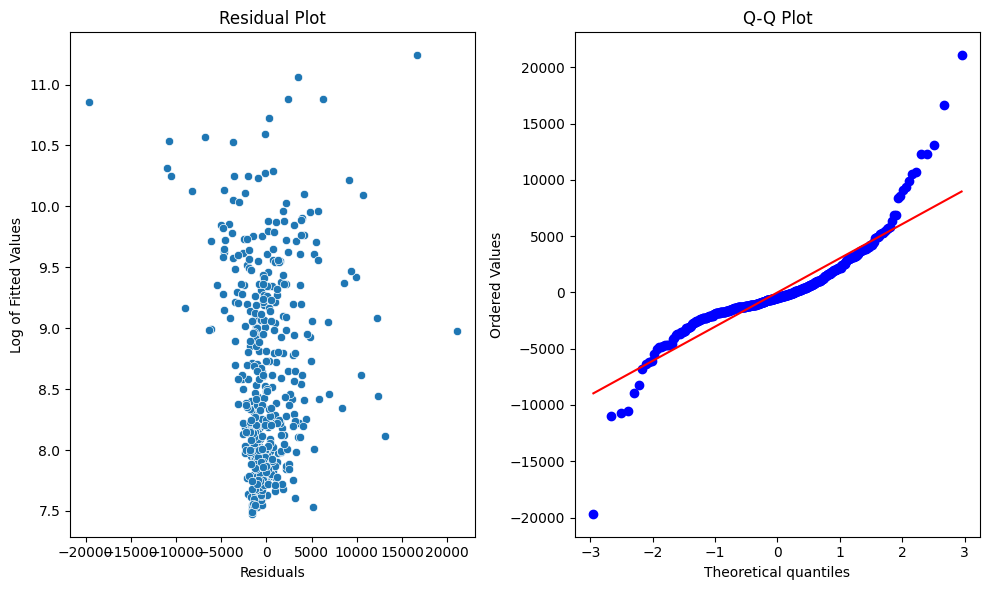

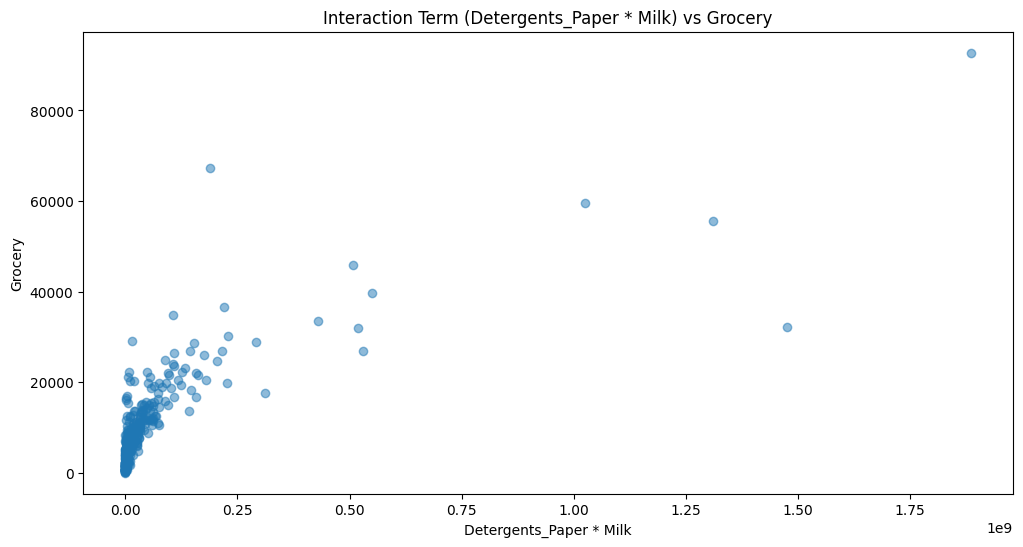

Feature Importance:
Detergents_Paper                     1.603753
Milk                                 0.291027
Detergents_Paper_Milk_interaction   -0.000002
dtype: float64


In [261]:
# Create interaction term between 'Detergents_Paper' and 'Milk'
df['Detergents_Paper_Milk_interaction'] = df['Detergents_Paper'] * df['Milk']

# Fit Linear Model with interaction term
fitd = smf.ols(formula='Grocery ~ Detergents_Paper + Milk + Detergents_Paper_Milk_interaction', data=df).fit()

# Print summary of the model
print("Summary of the Linear Model:")
print(fitd.summary())

print("R-squared:", fitd.rsquared)
print("Adjusted R-squared:", fitd.rsquared_adj)
print("RMSE:", np.sqrt(mean_squared_error(df['Grocery'], fitd.predict())))
print("MAE:", mean_absolute_error(df['Grocery'], fitd.predict()))

# Diagnostic Plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Residual Plot
sns.scatterplot(x=fitd.resid, y=np.log(fitd.fittedvalues), ax=axs[0])
axs[0].set_title('Residual Plot')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Log of Fitted Values')
# Q-Q Plot
probplot(fitd.resid, plot=axs[1])
axs[1].set_title('Q-Q Plot')
plt.tight_layout()
plt.show()

# Feature Importance
feature_importance = fitd.params.drop('Intercept')
print("Feature Importance:")
print(feature_importance)

## 1-16

In [ ]:
# Fitting a generalized linear model (GLM) with gamma distribution
fitd = smf.glm(formula='Grocery ~ Detergents_Paper + Milk', 
               family=sm.families.Gamma(link=sm.families.links.Log()), 
               data=df_products).fit()

# Print summary of the model
print("Summary of the GLM with gamma distribution:")
print(fitd.summary())

# Print AIC (Akaike Information Criterion)
print(f"AIC: {fitd.aic}")

Summary of the GLM with gamma distribution:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                Grocery   No. Observations:                  440
Model:                            GLM   Df Residuals:                      437
Model Family:                   Gamma   Df Model:                            2
Link Function:                    Log   Scale:                         0.37075
Method:                          IRLS   Log-Likelihood:                -4181.4
Date:                Fri, 16 Feb 2024   Deviance:                       198.51
Time:                        02:02:26   Pearson chi2:                     162.
No. Iterations:                    36   Pseudo R-squ. (CS):             0.8165
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

***Observation:***

Based on the results of our Linear models we see that the result of the test AIC, the Gamma family showed better results in predicting groceries  better than the OLS

## 1-17

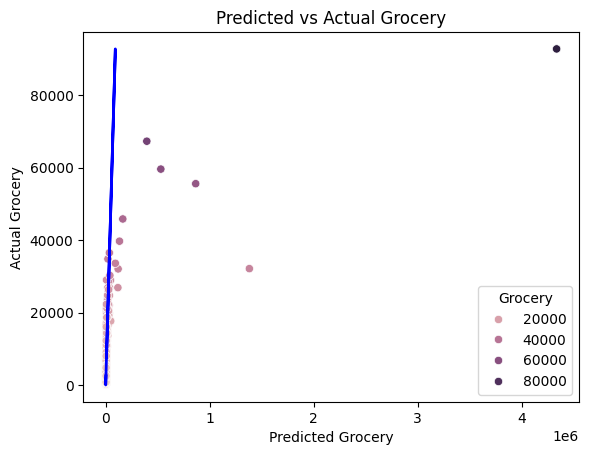

In [ ]:
# Checking predicted values against actual points
sns.scatterplot(x=fitd.predict(), y=df_products['Grocery'], hue=df_products['Grocery'])
# Line for perfect predictions
plt.plot(df['Grocery'], df['Grocery'], color='blue', linewidth=2)
plt.title('Predicted vs Actual Grocery')
plt.xlabel('Predicted Grocery')
plt.ylabel('Actual Grocery')
plt.show()

## 1-18

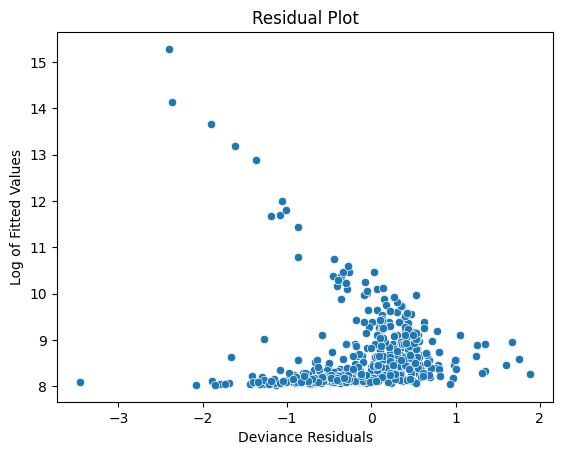

In [ ]:
# Plotting residual plot
sns.scatterplot(x=fitd.resid_deviance, y=np.log(fitd.fittedvalues))
plt.title('Residual Plot')
plt.xlabel('Deviance Residuals')
plt.ylabel('Log of Fitted Values')
plt.show()